# CMSC320: Final Tutorial
### By: Gautham Hari, Evan Guo, Arjun Rajaram

1. [Introduction](#Introduction)
2. [Data Collection](#Data-Collection)
    - [Collecting Rotten Tomatoes Dataset](#colecting-rotten-tomatoes-dataset)
    - [Collecting TMDB Dataset](#collecting-tmdb-dataset)
3. [Data Processing](#Data-Processing)
    - [Processing Columns](#processing-columns)
    - [Data Filtering](#data-filtering)
    - [Data Conversion and Column Renaming](#data-conversion-and-column-renaming)
    - [Merging Dataframes](#merging-dataframes)
4. [Exploratory Analysis & Data Visualization](#exploratory-analysis--data-visualization) 
5. [Model: Analysis, Hypothesis Testing, & ML](#Model:-Analysis,-Hypothesis-Testing,-&-ML)
6. [Interpretation: Insight & Policy Decision](#Interpretation:-Insight-&-Policy-Decision)

make sure to shuffle data and maybe do a K-fold cross validation 

## Introduction

Explanation 

Intro

## Data Collection


Description of section + prose

In [2]:
import pandas as pd
import numpy as np
import json
import datetime
import matplotlib.pyplot as plt
import sklearn as sklearn

pd.set_option('display.max_columns', None)


### Colecting Rotten Tomatoes Dataset

In [3]:
rotten_tomatoes_data=pd.read_csv('data/rotten_tomatoes/rotten_tomatoes_movies.csv')
rotten_tomatoes_movies_df = pd.DataFrame(rotten_tomatoes_data)
rotten_tomatoes_movies_df
#print(rotten_tomatoes_movies_df.columns)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2012-09-04,90.0,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,2014-07-24,122.0,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2017-01-13,95.0,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2016-06-10,127.0,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,2016-04-19,104.0,MCA Universal Home Video,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,2016-06-07,108.0,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7
17709,m/zorba_the_greek,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,2015-11-25,142.0,Fox,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2017-01-08,135.0,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1


### Colecting TMDB Dataset

In [4]:
tmdb_big_dataset=pd.read_csv('data/tmdb-box-office-prediction/TMDB_movie_dataset_v11.csv')
tmdb_big_dataset

# plt.scatter(tmdb_big_dataset['revenue'],tmdb_big_dataset['id'])


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037053,683919,Ellsworth Kelly: Fragments,0.000,0,Released,2007-12-31,0,66,False,NaN,0,NaN,tt26680258,en,Ellsworth Kelly: Fragments,Cameras record artist Ellsworth Kelly as he cr...,0.600,/9RyKOGsaxStcajEN4tuWe15r1w7.jpg,NaN,Documentary,NaN,NaN,NaN,"artist, art"
1037054,683921,César,0.000,0,Released,1971-01-21,0,50,False,NaN,0,NaN,NaN,en,César,"In 1971, Jean-Daniel Pollet & Guy Seligmann di...",0.600,/qEbNDYQJrkH51jF0bZl6GOJxBDe.jpg,Documentary about French artist César Baldaccini,Documentary,NaN,France,French,"sculpture, sculptor, sculpting"
1037055,683922,Notes on Lying,0.000,0,Released,2010-06-23,0,0,False,/ejDohyGHwTqdfu72psJKbFEiI9Q.jpg,0,NaN,tt1934345,en,Notes on Lying,A cautionary tale of lying. A curious thing ha...,0.840,/pPhBv7cyuu4g7dYdBdEkcGB6NQh.jpg,NaN,Drama,Blackbird Studios,"Canada, United States of America",NaN,NaN
1037056,683923,Do Your Homework,0.000,0,Released,2017-03-21,0,75,True,NaN,0,NaN,NaN,en,Do Your Homework,She didn't want to do her homework but she was...,0.600,/sOaPqyL4op1btUxa5pg9i1kz3S2.jpg,NaN,NaN,Nubiles,United States of America,NaN,NaN


In [5]:
tmdb_additional_df = pd.read_csv("data/additional_train/additionalTrainData.csv")




## Data Processing

In this section, we use the Pandas and NumPy libraries to clean and manipulate the dataframes. Provided below are links to the Pandas and NumPy documentation pages:

[Pandas Documentation](https://pandas.pydata.org/docs/index.html)

[NumPy Documentation](https://numpy.org/doc/stable/index.html#)

### Processing Columns

In [6]:
tmdb_additional_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2001 non-null   object 
 1   budget             2001 non-null   int64  
 2   imdb_id            1870 non-null   object 
 3   original_language  2001 non-null   object 
 4   original_title     2001 non-null   object 
 5   overview           1894 non-null   object 
 6   popularity         2001 non-null   float64
 7   release_date       2001 non-null   object 
 8   runtime            1895 non-null   float64
 9   tagline            1024 non-null   object 
 10  rating             2001 non-null   float64
 11  totalVotes         2001 non-null   int64  
 12  revenue            2001 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 203.4+ KB


In [7]:
rotten_tomatoes_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

Useless columns to drop: homepage, poster_path, status, belongs_to_collection (80% null)

(maybe also remove cast and crew if they don't really help)

In [8]:
tmdb_big_dataset.drop(['id','status','overview', 'backdrop_path', 'homepage', 'imdb_id','id','original_title','poster_path','tagline','keywords'], axis=1, inplace=True)

In [9]:
rotten_tomatoes_movies_df.drop(['movie_info','rotten_tomatoes_link','critics_consensus'],axis=1,inplace=True)

### Data Filtering

In [10]:
# can break this up into several statements
tmdb_big_dataset=tmdb_big_dataset[(tmdb_big_dataset['revenue']>=1000000) &(tmdb_big_dataset['budget']>=1000000) & (tmdb_big_dataset['genres']) & (tmdb_big_dataset['release_date']) & (tmdb_big_dataset['runtime']) & (tmdb_big_dataset['popularity']) & (tmdb_big_dataset['vote_average']>0) ]

### Data Conversion and Column Renaming

In [11]:
for index, row in tmdb_big_dataset.iterrows():
    datetime_object = datetime.datetime.strptime(str(row['release_date']), '%Y-%m-%d')
    tmdb_big_dataset.at[index,"release_date"]=datetime_object
    tmdb_big_dataset.at[index,"release_year"]=datetime_object.year
    
tmdb_big_dataset.rename(columns={'title': 'movie_title'}, inplace=True)
tmdb_big_dataset

/var/folders/wt/72vgw8nn0h31cgz_pk2bhfnc0000gp/T/ipykernel_10381/900814291.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmdb_big_dataset.at[index,"release_year"]=datetime_object.year
/var/folders/wt/72vgw8nn0h31cgz_pk2bhfnc0000gp/T/ipykernel_10381/900814291.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmdb_big_dataset.rename(columns={'title': 'movie_title'}, inplace=True)


,movie_title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages,release_year
1,Interstellar,8.417,32571,2014-11-05 00:00:00,701729206,169,False,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,2014.0
4,The Avengers,7.710,29166,2012-04-25 00:00:00,1518815515,143,False,220000000,en,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian",2012.0
6,Avengers: Infinity War,8.255,27713,2018-04-25 00:00:00,2052415039,149,False,300000000,en,154.340,"Adventure, Action, Science Fiction",Marvel Studios,United States of America,"English, Xhosa",2018.0
7,Fight Club,8.438,27238,1999-10-15 00:00:00,100853753,139,False,63000000,en,69.498,Drama,"Regency Enterprises, Fox 2000 Pictures, Taurus...",United States of America,English,1999.0
8,Guardians of the Galaxy,7.906,26638,2014-07-30 00:00:00,772776600,121,False,170000000,en,33.255,"Action, Science Fiction, Adventure",Marvel Studios,United States of America,English,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230598,"Ay, Juancito",7.000,1,2004-06-10 00:00:00,17159458,109,False,2800000,es,0.668,Drama,Aries Cinematográfica Argentina,Argentina,Spanish,2004.0
272680,Kung Food,7.000,1,2018-08-17 00:00:00,1197984,99,False,20000000,zh,3.597,"Animation, Family","Beijing Culture, Yi Animation",South Korea,Mandarin,2018.0
281763,Mastaney,10.000,1,2023-08-25 00:00:00,16367572,145,False,2169000,pa,2.907,"Action, Drama, History","Vehli Janta Films, Omjee Star Studios, Fateh F...",India,Punjabi,2023.0
332657,Ah Girls Go Army,6.000,1,2022-02-01 00:00:00,1785000,121,False,1428000,en,7.974,"Comedy, Drama","J Team Productions, MM2 Entertainment",Singapore,"Mandarin, English",2022.0


In [12]:
lst=[]
# Basically just creating a datetime object and putting it into the columna and adding a column release_year with the year
for index, row in rotten_tomatoes_movies_df.iterrows():
    if type(row['original_release_date'])!=str:
        lst.append(index)
    else:
        datetime_object = datetime.datetime.strptime(str(row['original_release_date']), '%Y-%m-%d')
        rotten_tomatoes_movies_df.at[index,"original_release_date"]=datetime_object
        rotten_tomatoes_movies_df.at[index,"release_year"]=datetime_object.year
rotten_tomatoes_movies_df.drop(lst)
rotten_tomatoes_movies_df

,movie_title,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,release_year
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12 00:00:00,2015-11-25,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,2010.0
1,Please Give,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30 00:00:00,2012-09-04,90.0,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19,2010.0
2,10,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05 00:00:00,2014-07-24,122.0,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8,1979.0
3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13 00:00:00,2017-01-13,95.0,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0,1957.0
4,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01 00:00:00,2016-06-10,127.0,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3,1954.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,Zoot Suit,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02 00:00:00,2016-04-19,104.0,MCA Universal Home Video,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4,1981.0
17708,Zootopia,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04 00:00:00,2016-06-07,108.0,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7,2016.0
17709,Zorba the Greek,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17 00:00:00,2015-11-25,142.0,Fox,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2,1964.0
17710,Zulu,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17 00:00:00,2017-01-08,135.0,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1,1964.0


### Merging Dataframes

In [13]:
movie_df=pd.merge(tmdb_big_dataset,rotten_tomatoes_movies_df,on=["movie_title","release_year"],how='inner')
movie_df

,movie_title,vote_average,vote_count,release_date,revenue,runtime_x,adult,budget,original_language,popularity,genres_x,production_companies,production_countries,spoken_languages,release_year,content_rating,genres_y,directors,authors,actors,original_release_date,streaming_release_date,runtime_y,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,Interstellar,8.417,32571,2014-11-05 00:00:00,701729206,169,False,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,2014.0,PG-13,"Action & Adventure, Science Fiction & Fantasy",Christopher Nolan,"Christopher Nolan, Jonathan Nolan","Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014-11-07 00:00:00,2016-05-24,165.0,Paramount Pictures,Certified-Fresh,72.0,364.0,Upright,86.0,175957.0,62,263,101
1,Avengers: Infinity War,8.255,27713,2018-04-25 00:00:00,2052415039,149,False,300000000,en,154.340,"Adventure, Action, Science Fiction",Marvel Studios,United States of America,"English, Xhosa",2018.0,PG-13,"Action & Adventure, Science Fiction & Fantasy",Anthony Russo,"Christopher Markus, Stephen McFeely","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",2018-04-27 00:00:00,2018-07-31,149.0,Walt Disney Pictures,Certified-Fresh,85.0,472.0,Upright,91.0,58720.0,57,400,72
2,Fight Club,8.438,27238,1999-10-15 00:00:00,100853753,139,False,63000000,en,69.498,Drama,"Regency Enterprises, Fox 2000 Pictures, Taurus...",United States of America,English,1999.0,R,"Comedy, Drama",David Fincher,Jim Uhls,"Brad Pitt, Edward Norton, Helena Bonham Carter...",1999-10-15 00:00:00,2015-11-25,139.0,20th Century Fox,Certified-Fresh,79.0,173.0,Upright,96.0,1093242.0,40,137,36
3,Guardians of the Galaxy,7.906,26638,2014-07-30 00:00:00,772776600,121,False,170000000,en,33.255,"Action, Science Fiction, Adventure",Marvel Studios,United States of America,English,2014.0,PG-13,"Action & Adventure, Science Fiction & Fantasy",James Gunn (II),"James Gunn (II), James Gunn, Nicole Perlman, D...","Chris Pratt, Zoe Saldana, Dave Bautista, Lee P...",2014-08-01 00:00:00,2015-11-15,121.0,Walt Disney Pictures,Certified-Fresh,91.0,328.0,Upright,92.0,255582.0,59,300,28
4,Django Unchained,8.171,24672,2012-12-25 00:00:00,425368238,165,False,100000000,en,54.224,"Drama, Western","The Weinstein Company, Columbia Pictures",United States of America,"English, French, German",2012.0,R,"Drama, Western",Quentin Tarantino,Quentin Tarantino,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...",2012-12-25 00:00:00,2017-03-24,165.0,The Weinstein Co.,Certified-Fresh,87.0,288.0,Upright,91.0,429231.0,55,250,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,The Sea of Grass,6.200,23,1947-04-25 00:00:00,4689000,123,False,2349000,en,3.541,"Drama, Western",Metro-Goldwyn-Mayer,United States of America,"English, Italian",1947.0,NR,"Classics, Drama, Western",Elia Kazan,"Marguerite Roberts, Vincent Lawrence","Spencer Tracy, Katharine Hepburn, Melvyn Dougl...",1947-04-25 00:00:00,2012-04-16,122.0,Warner Home Video,Rotten,14.0,7.0,Spilled,35.0,149.0,3,1,6
2321,Middle of Nowhere,6.196,23,2012-10-12 00:00:00,2368060,101,False,2000000,en,4.384,Drama,"Forward Movement, Kandoo Films",United States of America,English,2012.0,R,Drama,Ava DuVernay,Ava DuVernay,"Emayatzy E. Corinealdi, David Oyelowo, Omari H...",2012-10-12 00:00:00,2016-11-30,101.0,AFFRM,Certified-Fresh,88.0,50.0,Upright,64.0,2643.0,22,44,6
2322,Faithful,5.200,21,1996-04-03 00:00:00,2104439,91,False,13000000,en,4.889,"Comedy, Crime, Drama","New Line Cinema, Miramax",United States of America,English,1996.0,R,"Comedy, Drama",Paul Mazursky,Chazz Palminteri,"Cher, Chazz Palminteri, Ryan O'Neal, Paul Mazu...",1996-04-05 00:00:00,NaN,88.0,New Line Home Enter

Key features in mind: 

- budget
- genres
- rotten tomatoes score
- language
- popularity (figure out what this means/how it's calculated)
- runtime

Primary question: what's the most important predictor of revenue? How accurate is our revenue prediction (use metrics like MSE maybe)

## Exploratory Analysis & Data Visualization

After processing and cleaning our data, we can explore ann visualize our data to best get a feel for how it can be used to perform prediction on box office score. 


The first thing we will do is graph box office scores against time to visualize how box office scores have not only changed with time, but also the range of box office scores that our dataset contains. 

Text(0.5, 0, 'Date')

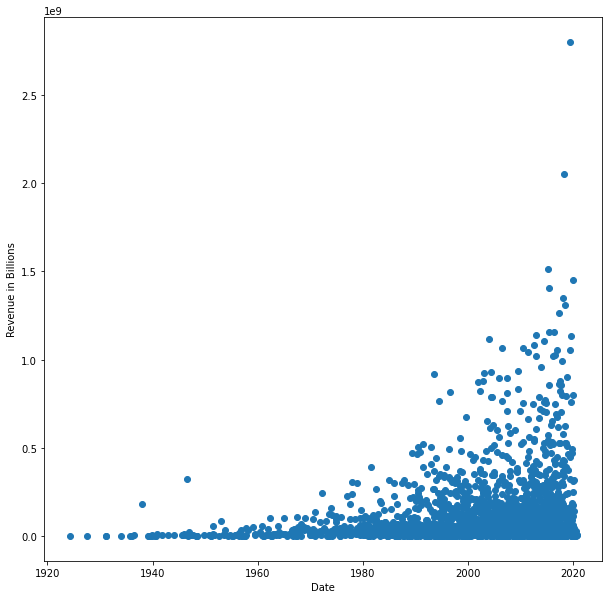

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(movie_df['release_date'],movie_df['revenue'])
plt.ylabel("Revenue in Billions")
plt.xlabel("Date")

Some testing to see intersection

In [15]:
# namedate_rotten = set()
# namedate_imdb = set()

# name_rotten = set()
# name_imdb = set()


# nameprod_rotten = set()
# nameprod_imdb = set()

# for index, row in o_rt_df.iterrows():
#     title = row["movie_title"]
#     tp = str(title) + str(row["production_company"])

#     nameprod_rotten.add(tp)

#     name_rotten.add(title)
#     if title == "The Grass Is Greener":
#         print(row)
#     #year month day
#     date = str(row["original_release_date"]).split("-")
#     if len(date) == 3: 
#         # title+= date[1]
#         # title+=date[0]
#         title+=date[0][2:]
#         #print(date[2][2:])
#         namedate_rotten.add(title)




# for index, row in o_bo_df.iterrows():
#     title = row["title"]
#     if title == "The Grass Is Greener":
#         print(row)
    
#     tp = str(title) + str(row["production_companies"])
#     nameprod_imdb.add(tp)
#     name_imdb.add(title)
#     date = str(row["release_date"]).split("/")


#     # if int(date[0]) < 10:
#     #     date[0] = "0" + date[0]
#     # if int(date[1]) < 10:
#     #     date[1] = "0" + date[1]
#     # for i in date:
#     #     title += i

#     title += date[2]
#     namedate_imdb.add(title)

In [16]:
# print(len(namedate_rotten))
# print(len(namedate_imdb))

# print(namedate_rotten)
# print(namedate_imdb)
# intersect = namedate_rotten.intersection(namedate_imdb)
#Values formatted as Titleyy
# print(len(intersect))


# print(name_rotten.intersection(name_imdb))
# for i in namedate_rotten:
#     if "The Grass Is Greener" in i:
#         print(i)
    
# for i in namedate_imdb:
#     if "The Grass Is Greener" in i:
#         print(i)

# print(len(nameprod_imdb.intersection(nameprod_rotten)))

In [17]:
# Code

## Model: Analysis, Hypothesis Testing, & ML

In [18]:
# Linear Regression
#Change the features included
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#K = 10, not really any reasoning behind it, but it's a common arbitrary value chosen
k = 10 

groups = np.array_split(movie_df.sample(frac = 1), k)
#groups
movie_df_ml = movie_df.dropna()
# for index,row in groups[0].iterrows():
#     print(row)
X = movie_df_ml[["vote_average", "vote_count", "release_year", "tomatometer_rating", "tomatometer_count", "audience_rating", "audience_count"]]
y = movie_df_ml[ "revenue"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

X_train

reg = LinearRegression().fit(X_train, y_train)

scores = cross_val_score(reg, X, y, cv=k)
scores




array([ 0.24248468,  0.10449693,  0.00905174, -0.06219867, -0.02934449,
       -0.22101283, -0.48573559, -0.55818031, -0.6119867 , -4.08916631])

In [19]:
y_pred = reg.predict(X_test)
error = []
index = 0
for item in y_test:
    error.append(abs(item - y_pred[index]))

print("mean error:" +str(sum(error)/len(error)))

print("mean value: "+str(sum(y_test)/len(y_test)))

print("percent error:" + str((sum(error)/len(error))/(sum(y_test)/len(y_test))))




mean error:99101006.50544359
mean value: 116234024.79298642
percent error:0.8525989415056662


In [ ]:
#Don't run block yet have not one hot encoded/binned the revenue data, also it takes hella long, like I left it for 10 min and it did nothing, also 
#I need to look at the docs more closely, it might just be returning a normalized value from 0 to 1 instead of a class

import tensorflow as tf 

target = movie_df_ml.pop('revenue')

numeric_feature_names = ["vote_average", "vote_count", "release_year", "tomatometer_rating", "tomatometer_count", "audience_rating", "audience_count"]
numeric_features = movie_df_ml[numeric_feature_names]

#converting the dataframe to something tensorflow can take as an input
tf.convert_to_tensor(numeric_features)
#Using arbitrarily sized hidden layers rn, will change later


#normalizing the data as it's passed in I assume to a 0-1 range, but not sure
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(numeric_features)



def get_basic_model():
  #initializing the model layers
  model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)   #NEED TO BIN VALUES/ONE HOT ENCODE THEM
  ])
  #setting loss function, not sure what optimizer is
  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

model = get_basic_model()
model.fit(numeric_features, target, epochs=15, batch_size=5)

## Interpretation: Insight & Policy Decision

In [ ]:
# Code